In [220]:
import pandas as pd
import numpy as np
import seaborn as sns

from vega_datasets import data

# Working With Time Series Data

## San Francisco Temps Exercise 1

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [221]:
# pull in data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [222]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [223]:
# set date as index and sort
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [224]:
# resample from hourly data to daily data
daily_mean = df.resample('D').mean()
daily_mean.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

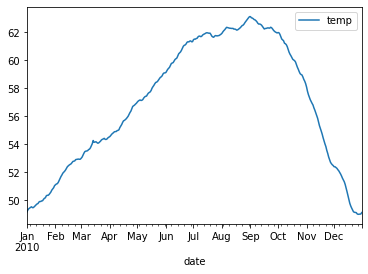

In [225]:
# visualize average temperature over time
daily_mean.plot()

## Exercise 2

Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

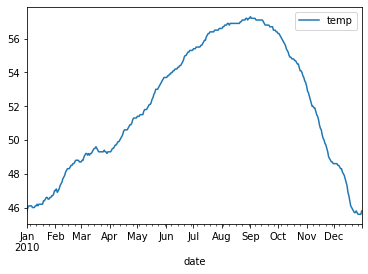

In [226]:
# resample from hourly data to daily data
daily_min = df.resample('D').min()

# visualize min temperature over time
daily_min.plot()

## Exercise 3

Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

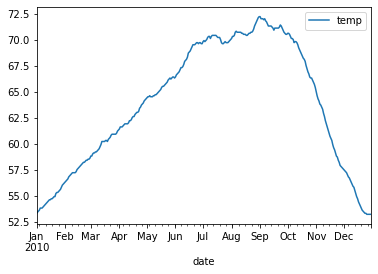

In [227]:
# resample from hourly data to daily data
daily_max = df.resample('D').max()

# visualize min temperature over time
daily_max.plot()

## Exercise 4

Which month is the coldest, on average?

In [228]:
# downsample from hourly to monthly data
monthly = df.resample('M').mean()

In [229]:
# create a month column
monthly['month'] = monthly.index.strftime('%B')
monthly.head()

,temp,month
date,,
2010-01-31,49.984140,January
2010-02-28,52.243899,February
2010-03-31,53.956528,March
2010-04-30,55.633056,April
2010-05-31,57.970968,May


In [230]:
# get month with min avg temp
monthly[monthly.temp == monthly.temp.min()]

,temp,month
date,,
2010-01-31,49.98414,January


## Exercise 5

Which month has the highest average temperature?

In [231]:
# get month with max avg temp
monthly[monthly.temp == monthly.temp.max()]

,temp,month
date,,
2010-09-30,62.487083,September


## Exercise 6

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [232]:
# downsample from hourly to daily data
daily_max = df.resample('D').max()
daily_min = df.resample('D').min()

In [233]:
# merge dataframes together
daily = daily_max.merge(daily_min, on='date')
daily.head()

,temp_x,temp_y
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0
2010-01-03,53.5,46.1
2010-01-04,53.6,46.1
2010-01-05,53.8,46.1


In [234]:
# rename columns
daily = daily.rename(columns={'temp_x':'max', 'temp_y':'min'})
daily.head(2)

,max,min
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0


In [235]:
# create a diff column that contains the temperature variance for the day
daily['diff'] = daily['max'] - daily['min']
daily.head(2)

,max,min,diff
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4


In [236]:
# downsample from daily to monthly data
monthly_max = pd.DataFrame(daily.resample('M').diff.max())
monthly_max

,diff
date,
2010-01-31,9.3
2010-02-28,9.9
2010-03-31,12.0
2010-04-30,13.0
2010-05-31,13.1
2010-06-30,14.8
2010-07-31,14.8
2010-08-31,15.0
2010-09-30,14.9


In [237]:
# get month with largest amount of variability
monthly_max['diff'].idxmax()

Timestamp('2010-08-31 00:00:00', freq='M')

**Another simpler way**

In [238]:
# downsample to daily data and get min and max for each day
daily_stats = df.temp.resample('D').agg(['min','max'])
daily_stats.head(2)

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4


In [239]:
# create a diff column subtracting min from max
daily_stats['diff'] = daily_stats['max'] - daily_stats['min']
daily_stats.head(2)

,min,max,diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4


In [240]:
# downsample from daily to monthly data and get month with largest amount of variability
daily.resample('M').diff.max().idxmax()

Timestamp('2010-08-31 00:00:00', freq='M')

## Exercise 7

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [241]:
# check data
df.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


In [242]:
# downsample from hourly to daily data
daily_results = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily_results

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8
...,...,...,...
2010-12-27,45.6,48.991667,53.2
2010-12-28,45.6,49.000000,53.2
2010-12-29,45.6,49.012500,53.2


<AxesSubplot:xlabel='date'>

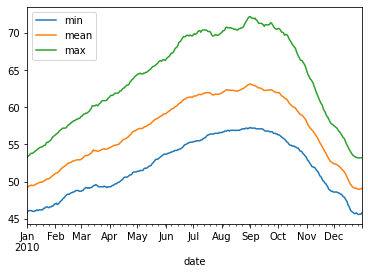

In [243]:
# plot results
daily_results.plot()

## Seattle Weather Exercise 1

Which year and month combination has the highest amount of precipitation?

In [244]:
# import and assign data to a variable
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [245]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [246]:
# set date column as index
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [247]:
# downsample to sum of each month's precipitation and return the month/year with max precipitation
df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

## Exercise 2

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

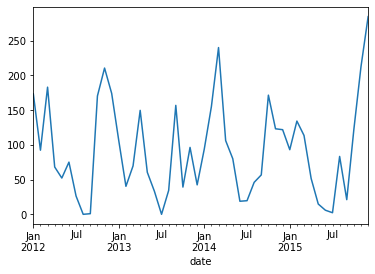

In [248]:
# downsample to sum of each month's precipitation and visualize
df.resample('M').precipitation.sum().plot()

## Exercise 3

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

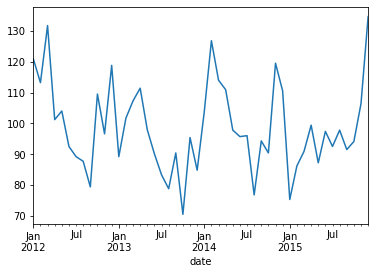

In [249]:
# downsample to sum of monthly wind and visualize
df.resample('M').wind.sum().plot()

## Exercise 4

Which year-month combination is the windiest?

In [250]:
# downsample to sum of monthly wind and return the month/year with max wind
df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

## Exercise 5

What's the sunniest year?

In [251]:
# check data
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [252]:
# check weather value counts
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [253]:
# create a was_sunny column that contains boolean values
df['was_sunny'] = df.weather == 'sun'

# check column value counts
df.was_sunny.value_counts()

False    747
True     714
Name: was_sunny, dtype: int64

In [254]:
# downsample to sum of annual sunny days and return year with the most sunny days
df.resample('Y').was_sunny.sum().idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

## Exercise 6

In which month does it rain the most?

In [255]:
# create a month column
df = df.assign(month = df.index.strftime('%B'), did_rain = df.weather == 'rain')
df.head(2)

,precipitation,temp_max,temp_min,wind,weather,was_sunny,month,did_rain
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,January,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,January,True


In [256]:
# group by month and get month which had the most rainy days 
df.groupby('month').did_rain.sum().idxmax()

'February'

## Exercise 7

Which month has the most number of days with a non-zero amount of precipitation?

In [257]:
# create a column with a boolean indicating if the precipitation column value is greater than 0
df['some_precipitation'] = df.precipitation > 0

In [258]:
# group by month and get month which had the most days of precipitation
df.groupby('month').some_precipitation.sum().idxmax()

'December'

## Flights Exercise 1

Convert any negative delays to 0.

In [259]:
# pull in data
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [260]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [261]:
# set date as index and sort
df = df.set_index('date').sort_index()

In [262]:
# replace negative delays with 0
df.delay = np.where(df.delay < 0, 0, df.delay)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## Exercise 2

Which hour of the day has the highest average delay?

In [263]:
# create an hour column
df['hour'] = df.index.strftime('%H')
df.head(2)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00
2001-01-01 06:20:00,0,491,BNA,MCI,06


In [264]:
# group by hour and find highest average delay
df.groupby('hour').delay.mean().idxmax()

'03'

## Exercise 3

Does the day of the week make a difference in the delay amount?

In [265]:
# create a day of the week column
df['day_of_week'] = df.index.strftime('%a')
df.head(2)

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00,Mon
2001-01-01 06:20:00,0,491,BNA,MCI,06,Mon


In [266]:
# group by day of the week and sort mean delay
df.groupby('day_of_week').delay.mean().sort_values()

day_of_week
Mon     7.165772
Sat     8.431498
Tue     9.410866
Sun    10.413542
Wed    11.032478
Thu    12.821322
Fri    17.757596
Name: delay, dtype: float64

## Exercise 4

Does the month make a difference in the delay amount?

In [267]:
# create a month column
df['month'] = df.index.strftime('%b')
df.head(2)

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00,Mon,Jan
2001-01-01 06:20:00,0,491,BNA,MCI,06,Mon,Jan


In [268]:
# group by month and sort total delay
df.groupby('month').delay.mean().sort_values()

month
Mar     9.875287
Jan    11.301592
Feb    12.306106
Name: delay, dtype: float64

# Bonus

In [103]:
# pull in data
from vega_datasets import data
df = data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [104]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [105]:
# check value counts
df.source.value_counts()

Renewables        17
Fossil Fuels      17
Nuclear Energy    17
Name: source, dtype: int64

In [106]:
# set year column as index
df = df.set_index('year').sort_index()
df.head(10)

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574
2002-01-01,Renewables,1963
2003-01-01,Fossil Fuels,36234
2003-01-01,Nuclear Energy,3988
2003-01-01,Renewables,1885


In [107]:
# check min and max dates
df.index.min(), df.index.max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2017-01-01 00:00:00'))

## Exercise 1

For each row, calculate the percentage of the year's total that energy source provided.

In [108]:
# create a total generation by year column with the sum for each year
df['generation_by_yr'] = df.groupby(df.index.year).net_generation.transform('sum')
df.head()

,source,net_generation,generation_by_yr
year,,,
2001-01-01,Fossil Fuels,35361,40651
2001-01-01,Nuclear Energy,3853,40651
2001-01-01,Renewables,1437,40651
2002-01-01,Fossil Fuels,35991,42528
2002-01-01,Nuclear Energy,4574,42528


In [110]:
# create a percent of total column that contains the percentage of generation for that year by each source
df['pct_of_total'] =  df.net_generation / df.generation_by_yr
df.head()

,source,net_generation,generation_by_yr,pct_of_total
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2001-01-01,Nuclear Energy,3853,40651,0.094782
2001-01-01,Renewables,1437,40651,0.035350
2002-01-01,Fossil Fuels,35991,42528,0.846290
2002-01-01,Nuclear Energy,4574,42528,0.107553


## Exercise 2

Lineplot of generation over time, color by source

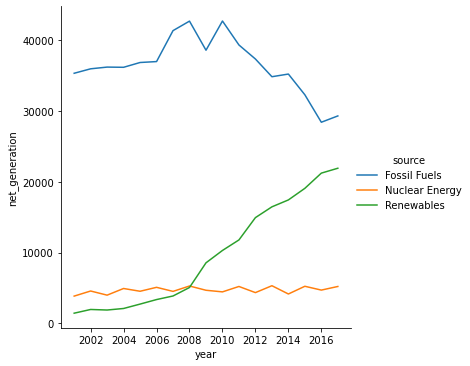

In [115]:
# plot data
sns.relplot(data=df, x='year', y='net_generation', hue='source', kind='line')

## Exercise 3

Display the data as table where years are columns, and energy source is rows

In [118]:
# use pivot table to change display
df2 = df.pivot_table(index='source', columns='year', values='net_generation')
df2

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933
